# Chapter 2 Exploratory Data Analysis



## 2.2 Visualization
Data visualization is an important skill to have for a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the `R` language, we will explore the visualization tools provided by the `R` language and packages. Even if we restrict ourselves to `R`, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will also look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).


With smartphones and computers, it is more effective than decades ago to display our findings in graphics or animations on screens. Visualization becomes one of the key tool in exploratory data analysis. We will discuss a couple basic visualization strategies using real data examples in what follows. 

Note that, when space is limited, we can summarize information in plots into numbers that can be reported in-line or in tables. 

### 2.2.1 Billionaires 

The file `bil.RData` contains a dataset on [billionaires](https://think.cs.vt.edu/corgis/csv/billionaires/): who they are, where they are from, how & when they made their fortune, etc.

In [3]:
load('../Data/bil.RData')
library(tidyverse)
library(ggplot2)
bil<-as_tibble(bil);
print(bil)

# A tibble: 2,614 x 22
     age category citizenship company.name company.type `country code` founded
   <int> <chr>    <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financi~ Saudi Arab~ Rolaco Trad~ new          SAU               1968
 2    34 Financi~ United Sta~ Fidelity In~ new          USA               1946
 3    59 Non-Tra~ Brazil      Companhia B~ new          BRA               1948
 4    61 New Sec~ Germany     Ratiopharm   new          DEU               1881
 5    -1 Financi~ Hong Kong   Swire        new          HKG               1816
 6    -1 Traded ~ Bahrain     YBA Kanoo    new          BHR               1890
 7    -1 New Sec~ Japan       Otsuka Hold~ new          JPN               1921
 8    -1 Traded ~ Japan       Sony         new          JPN               1946
 9    66 Financi~ Japan       Mori Buildi~ new          JPN               1959
10    -1 Traded ~ France      Chanel       new          FRA               1909
# ... with 2,604 more rows, a

Let's first explore the regions of the billionares in this data set. The variable `region` is categorical in the `billionaire` data set. Hence, we can use the `count()` function to summarize the frequencies. 

In [4]:
count(bil, region)

region,n
<chr>,<int>
East Asia,535
Europe,698
Latin America,182
Middle East/North Africa,117
North America,992
South Asia,69
Sub-Saharan Africa,20
NA,1


We can turn this table into a bar chart using `ggplot2`'s `geom_bar()` function. 

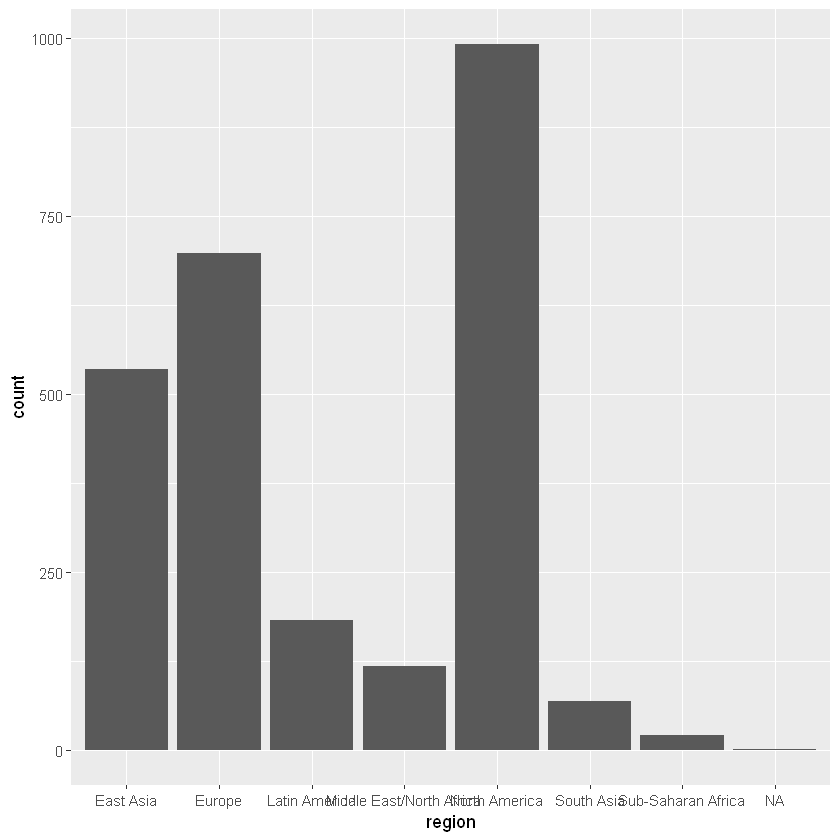

In [6]:
ggplot(data=bil) +
    geom_bar(mapping=aes(x=region)) 


If instead we are interested in the net worth, a bar plot is no longer applicable as every billionare potentially has a different net worth. Instead we create a **histogram**. The command to do this is **geom_histogram**.

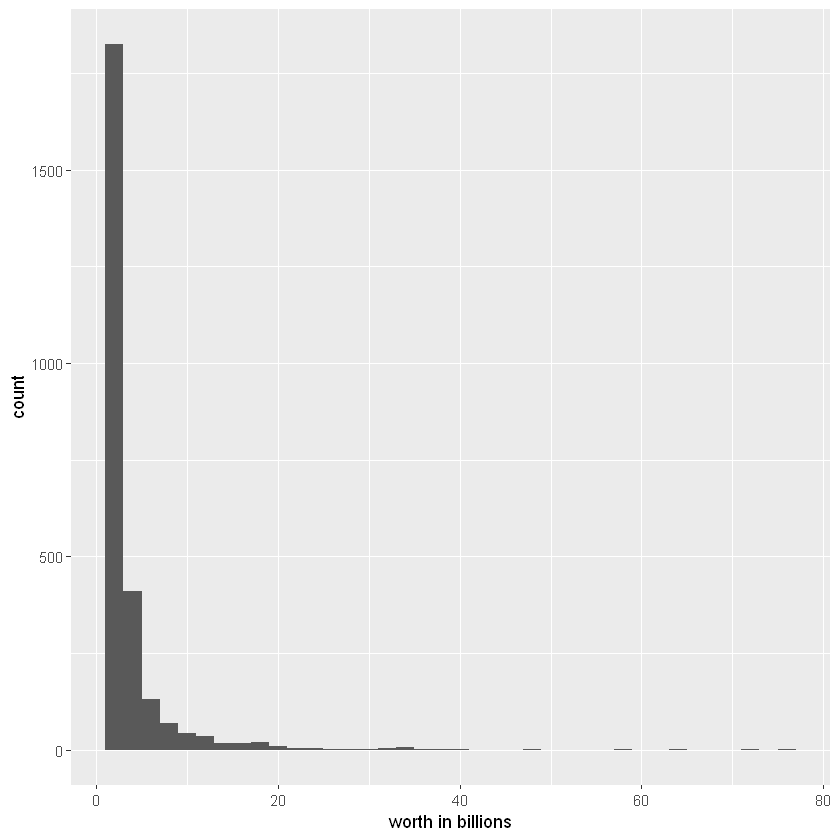

In [8]:
bil %>% ggplot + 
    geom_histogram(mapping = aes(x=`worth in billions` ),
                  binwidth=2)

What can you see from this plot? 

Most billionaires are worth a paltry \\$1-5b. However, the distribution has a "long tail": there are some billionaires who are worth as much as \\$60-80b. Interestingly, the income distribution among billionaires looks quite a bit like the income distribution in society as a whole. Even the .001% have their 1%.

We can use the **geom_histogram** to visualize other features in the dataset. Let's look at the disribution of the ages of billionaires. 

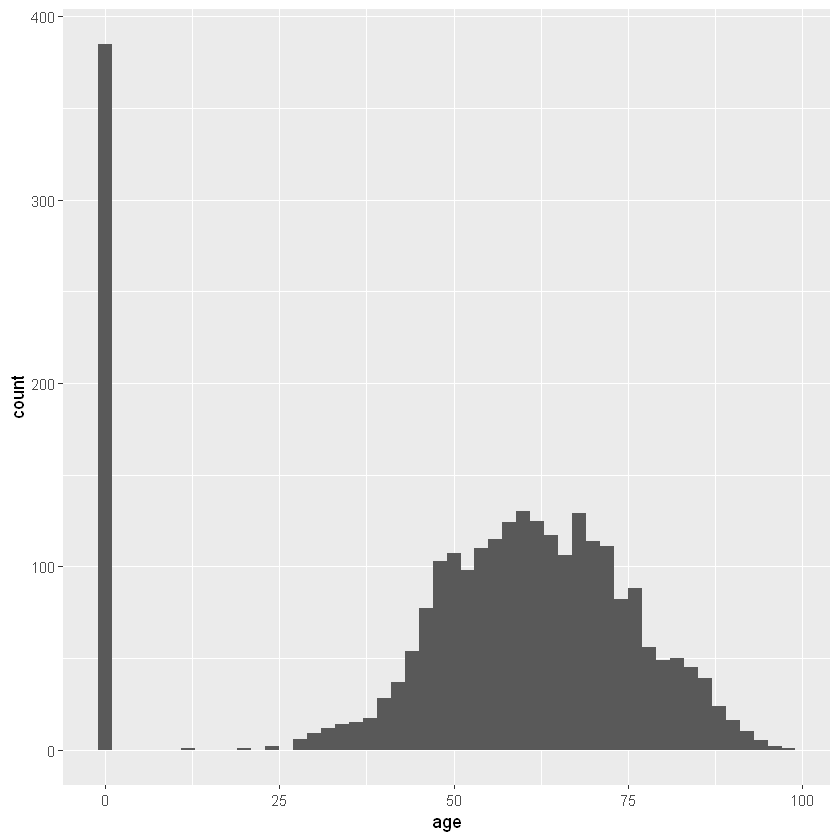

In [9]:
bil %>% ggplot + 
    geom_histogram(mapping = aes(x=age),
                  binwidth=2)

Typical values of `age` in these data range from about 30 to 90. We see a very unusual spike around zero. Let us try to investigate more by filtering the data set to contain only rows with age less than 10.   

In [12]:
filter(bil, age<10) %>% arrange(age) %>% print

# A tibble: 385 x 22
     age category citizenship company.name company.type `country code` founded
   <int> <chr>    <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financi~ Saudi Arab~ Rolaco Trad~ new          SAU               1968
 2    -1 Financi~ Hong Kong   Swire        new          HKG               1816
 3    -1 Traded ~ Bahrain     YBA Kanoo    new          BHR               1890
 4    -1 New Sec~ Japan       Otsuka Hold~ new          JPN               1921
 5    -1 Traded ~ Japan       Sony         new          JPN               1946
 6    -1 Traded ~ France      Chanel       new          FRA               1909
 7    -1 Non-Tra~ Mexico      Groupo IUSA  new          MEX               1939
 8    -1 Financi~ Mexico      Pulsar Inte~ new          MEX               1981
 9    -1 Traded ~ Netherlands Heineken In~ new          NLD               1864
10    -1 NA       United Sta~ MBNA         subsidiary   USA               1982
# ... with 375 more rows, and 1

These represent missing data where we **do not know** the person's age. Here `-1` can not be a valid entry of ages, according to common sense. Unfortunately, `R` does not have human common sense.  We'll translate this for `R` by *recoding* all values of -1 to `NA`.

In [13]:
bil <- mutate(bil, age = na_if(age,-1))

The `na_if(a,b)` function as setting `a` to be equal to `NA` if `a==b`.

A good way to get a sense of typical values is by looking at percentiles. The $p$th percentile of a column is the number $x$ for which $p$% of the values are less than or equal to $x$. The best known example is the *median*: half the values are below the median.

In [14]:
(q <- quantile(bil$age, probs=c(0.025, 0.5, 0.975), na.rm=T))

2.5%   50% 97.5% 
   37    62    88

This tells us that 98% of the billionaires are between 32 and 90. Let us redo the visualization with extreme values filtered out.

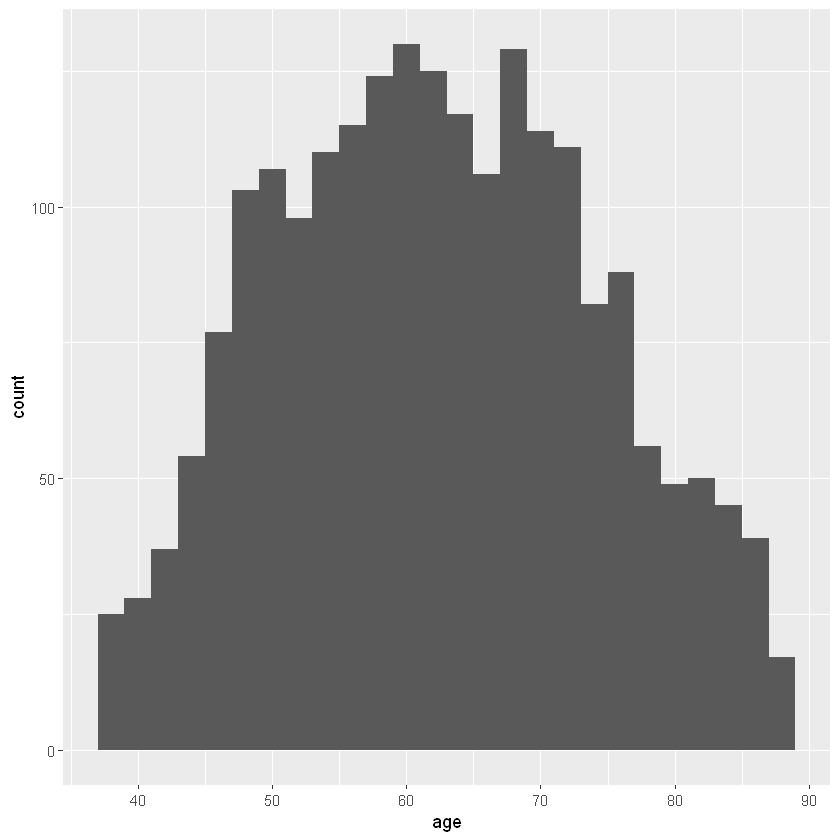

In [15]:
bil %>% filter(between(age,37,88)) %>%
    ggplot + 
    geom_histogram(mapping = aes(x=age),
                  binwidth=2)